In [1]:
%%capture
!pip install '../input/swag-dnn/SWAG_DNN-0.1.2-py3-none-any.whl'

In [2]:
# Future imports
from __future__ import absolute_import, division, print_function

# Keras imports
import keras
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10, mnist
from keras.engine import Layer
from keras.initializers import RandomNormal, glorot_normal
from keras.layers import (
    AveragePooling1D,
    AveragePooling2D,
    AveragePooling3D,
    MaxPooling2D,
    Dense,
    Activation,
    Flatten,
    Dropout,
    BatchNormalization,
    Input,
    Embedding,
    LSTM,
    concatenate,
    MaxPool2D,
    Conv2D,
    MaxPooling1D,
    MaxPooling3D,
    activations,
    InputSpec,
)
from keras.legacy import interfaces
from keras.legacy.layers import AtrousConvolution1D, AtrousConvolution2D
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import conv_utils, np_utils, plot_model
from keras.utils.generic_utils import (
    func_dump,
    func_load,
    deserialize_keras_object,
    has_arg,
    get_custom_objects,
)

# Other imports
import numpy as np
import matplotlib.pyplot as plt
import time

from SWAG_DNN.Full import *

# Load MNIST dataset
def load_data():
    (x_train, _), (x_test, _) = mnist.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    return x_train, x_test

# Plot training and test loss
def plot_1(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()




Using TensorFlow backend.


In [3]:
# Set the size of the encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Create the input placeholder
input_img = Input(shape=(784,))

# Define the encoding and decoding layers
encoded = Dense_Co_NEW(encoding_dim, activation='relu')(input_img)
decoded = Dense_Co_NEW(784, activation='sigmoid')(encoded)

# Alternative encoding and decoding layers (uncomment to use)
# encoded = Dense_S(encoding_dim, activation='relu')(input_img)
# decoded = Dense_S(784, activation='sigmoid')(encoded)

# Create the autoencoder model mapping input to reconstruction
autoencoder = Model(input_img, decoded)

# Create the encoder model mapping input to encoded representation
encoder = Model(input_img, encoded)

# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [4]:
# Load data
x_train, x_test = load_data()

# Preprocess the data
x_train = (x_train + 1) / 256
x_test = (x_test + 1) / 256

# Reshape the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print the shapes of the preprocessed data
print(x_train.shape)
print(x_test.shape)

# Set the number of epochs
ep = 25

# Train the autoencoder and measure the time taken
start_time = time.time()
history1 = autoencoder.fit(
    x_train,
    x_train,
    epochs=ep,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=0,
)
print("--- %s seconds ---" % (time.time() - start_time))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs1 = decoder.predict(encoded_imgs)


11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)
--- 40.09242081642151 seconds ---


In [5]:
# Load data
x_train, x_test = load_data()

# Preprocess the data
x_train = (x_train + 20) / 320
x_test = (x_test + 20) / 320

# Reshape the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print the shapes of the preprocessed data
print(x_train.shape)
print(x_test.shape)

# Set the number of epochs
ep = 25

# Train the autoencoder and measure the time taken
start_time = time.time()
history2 = autoencoder.fit(
    x_train,
    x_train,
    epochs=ep,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=0,
)
print("--- %s seconds ---" % (time.time() - start_time))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs2 = decoder.predict(encoded_imgs)


(60000, 784)
(10000, 784)
--- 36.05267381668091 seconds ---


In [6]:
# Load data
x_train, x_test = load_data()

# Preprocess the data
x_train = (x_train + 1) / 256
x_test = (x_test + 1) / 256

# Define the autoencoder architecture
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Create the encoder model
encoder = keras.Model(input_img, encoded)

# Create the decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print the shapes of the preprocessed data
print(x_train.shape)
print(x_test.shape)

# Train the autoencoder and measure the time taken
start_time = time.time()
ep = 25
history3 = autoencoder.fit(
    x_train,
    x_train,
    epochs=ep,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=0,
)
print("--- %s seconds ---" % (time.time() - start_time))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs3 = decoder.predict(encoded_imgs)


(60000, 784)
(10000, 784)
--- 20.55393099784851 seconds ---


In [7]:
# Load data
x_train, x_test = load_data()

# Preprocess the data
x_train = (x_train + 20) / 320
x_test = (x_test + 20) / 320

# Define the autoencoder architecture
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Create the encoder model
encoder = keras.Model(input_img, encoded)

# Create the decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print the shapes of the preprocessed data
print(x_train.shape)
print(x_test.shape)

# Train the autoencoder and measure the time taken
start_time = time.time()
ep = 25
history4 = autoencoder.fit(
    x_train,
    x_train,
    epochs=ep,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=0,
)
print("--- %s seconds ---" % (time.time() - start_time))


(60000, 784)
(10000, 784)
--- 21.50453495979309 seconds ---


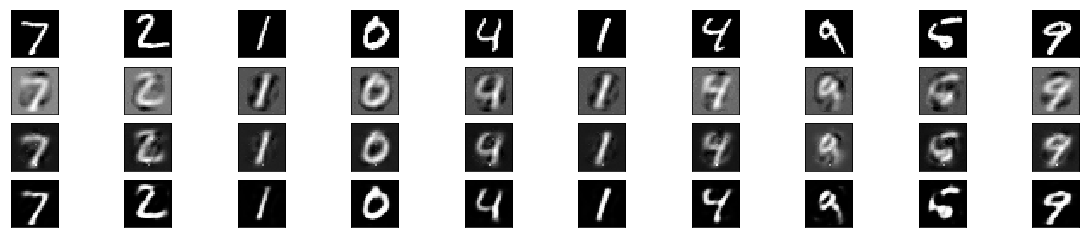

In [8]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images from decoded_imgs1
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images from decoded_imgs2
    ax = plt.subplot(4, n, i + 1 + n * 2)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images from decoded_imgs3
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [9]:
histories = []

def plot_(histories):
    plt.rcParams.update({'font.size': 16})
    # size = 1
    in_1 = histories[0]
    in_2 = histories[1]

    plt.figure(figsize=(20, 10))

    # Plot SWAG with no data transformation
    plt.subplot(231)
    training_loss1 = in_1.history['loss']
    test_loss1 = in_1.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('SWAG with no data transformation')

    # Plot Traditional Autoencoder
    plt.subplot(232)
    training_loss1 = in_2.history['loss']
    test_loss1 = in_2.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Traditional Autoencoder')

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3, wspace=0.18)
    plt.show()


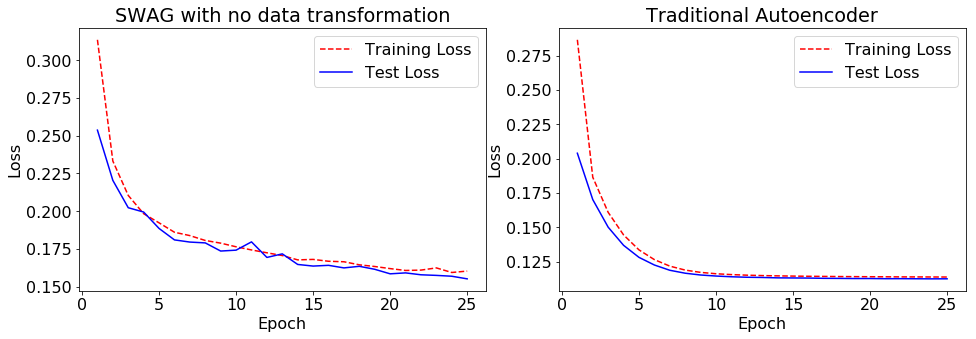

In [10]:
plot_([history1,history3])